This notebook shows you how to clean up some data in a CSV file
The data used here is purely hypothetical

# Cleaning up and 'skimming'  data in Python


In [86]:
# step 1 is to load up the right libraries
# although this can vary we will probably use pandas, numpy and matplotlib 
#for matplotib, let's not take the whole thing, just pyplot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly.express as px
import PIL
from PIL import Image

In [87]:
# step 2 is to load up the actual data into a dataframe we will call 'df'
# replace my file with your new file here
#here is an example without the path:

#df = pd.read_csv (r'Path where the CSV file is stored\File name.csv')

# now for real

df = pd.read_csv('C:/Users/makeda/programming/fakepatients.csv')


In [88]:
# the next step, step 3, part one, is to check we loaded by looking at say 20 elements- taking a peek
print (df.head(20))

    patient_id        age           Patient name           condition  \
0     BF6EA5AF  30.950463             Marina Rei                 HTN   
1     FB1E568E  94.327000           Stive Morgan              anemia   
2     FB1E568E  94.327000           Stive Morgan  sickle cell anemia   
3     EF15C7BA   2.988667                    NaN                 CRF   
4     82F52E69  64.592109           Rixton Moore                 HTN   
5     4166D680   1.002333             Henry Band                copd   
6      F4F5677   0.033333                    NaN             obesity   
7     386FE1ED  70.626667                    NaN              asthma   
8     A5E0D927   1.053667  Andrew Paul Woodworth                 HTN   
9     E9E8A0CA  91.463333           Pillar Point               COVID   
10    D3DD8D00   2.945333         Steve Campbell                copd   
11    596A4517   0.000000           David Civera                 HTN   
12    2E50EDF9  81.680000           Lumipa Beats              hi

In [5]:
#step 3.5 is to get details on the whole csv table
print('The column names on the table are:',df.columns)
print("The table has x entries with y data points- x,y here are:", df.shape)
print("Let's see the types of data:", df.dtypes)
print("The whole thing is ",df.info)

The column names on the table are: Index([' patient_id', 'age', 'Patient name', 'condition', 'imaging_done',
       'wait time'],
      dtype='object')
The table has x entries with y data points- x,y here are: (101, 6)
Let's see the types of data:  patient_id      object
age             float64
Patient name     object
condition        object
imaging_done     object
wait time        object
dtype: object
The whole thing is  <bound method DataFrame.info of      patient_id         age           Patient name           condition  \
0      BF6EA5AF   30.950463             Marina Rei                 HTN   
1      FB1E568E   94.327000           Stive Morgan              anemia   
2      FB1E568E   94.327000           Stive Morgan  sickle cell anemia   
3      EF15C7BA    2.988667                    NaN                 CRF   
4      82F52E69   64.592109           Rixton Moore                 HTN   
5      4166D680    1.002333             Henry Band                copd   
6       F4F5677    0.033

In [6]:
# step 4 is to start to clean up the data a bit
# let's look at how many duplicates we have
# duplicates here meanthe wholeline is duplicated

df.duplicated().sum()
# we can clean it later

1

In [7]:
# interesting, let's see if we can examine where it is
if df.duplicated().any() == True:
    print(df.duplicated())


0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
71     False
72     False
73     False
74     False
75     False
76     False
77     False
78     False
79     False
80     False
81     False
82     False
83     False
84     False
85     False
86     False
87     False
88     False
89     False
90     False
91     False
92     False
93     False
94     False
95     False
96     False
97     False
98     False
99     False
100     True
Length: 101, dtype: bool


In [8]:
#let's just print the 'total'dupes

In [9]:

# Select all duplicate rows based on one column- example here is Patient name
# note keep can be set to 'first', 'last' or False- 
#keep denotes the occurrence which should be marked as duplicate
# False - show me all of them
#default value is ‘first’.
duplicateRowsDF = df[df.duplicated(['Patient name'], keep = False)]
 
print("Duplicate Rows based on a single column are:", duplicateRowsDF, sep='\n')

Duplicate Rows based on a single column are:
     patient_id        age  Patient name           condition imaging_done  \
1      FB1E568E  94.327000  Stive Morgan              anemia           CT   
2      FB1E568E  94.327000  Stive Morgan  sickle cell anemia           ct   
3      EF15C7BA   2.988667           NaN                 CRF           ct   
6       F4F5677   0.033333           NaN             obesity          NaN   
7      386FE1ED  70.626667           NaN              asthma           xr   
14      5A3095E   0.000000           NaN                 NaN          NaN   
25     13C442BF  72.333333           NaN                 CRF          MRI   
26     C4AF055B   0.000000           NaN                 NaN          NaN   
35      D8B3971  44.704208           NaN              anemia           ct   
40     2FBD8201   0.100000           NaN                 NaN          NaN   
47     B39466EE   0.100000           NaN                 NaN          NaN   
51     58D5A9C7   0.872000     

In [10]:
#lets see how many NaNs (here interchangeable with null ) we have in the table
df.isnull().sum()

 patient_id      0
age              0
Patient name    11
condition        6
imaging_done     5
wait time       69
dtype: int64

In [11]:
#let's assume we can drop the duplicates, and do so
df_nodupe = df.drop_duplicates().reset_index(drop = True)


In [12]:
#check the duplicated in the new df
df_nodupe.duplicated().sum()

0

In [13]:
#drop from the new df the Nans
df_nodupesornans = df_nodupe.dropna()

In [14]:
#verify it is clean
df_nodupesornans.isna().sum()

 patient_id     0
age             0
Patient name    0
condition       0
imaging_done    0
wait time       0
dtype: int64

In [15]:
#let's change the column_names
df_nodupesornans.set_axis(['patient','age','name','condition','image_type','time'], axis= 'columns', inplace = True)

In [16]:
# actually lets also drop the name column, seems like a good idea
df_nodupesornans.drop(columns= 'name')

,patient,age,condition,image_type,time
0,BF6EA5AF,30.950463,HTN,XR,1
1,FB1E568E,94.327000,anemia,CT,2
2,FB1E568E,94.327000,sickle cell anemia,ct,3
4,82F52E69,64.592109,HTN,ct,5
5,4166D680,1.002333,copd,MRI,6
8,A5E0D927,1.053667,HTN,xr,9
9,E9E8A0CA,91.463333,COVID,xr,9
11,596A4517,0.000000,HTN,MRI,12
12,2E50EDF9,81.680000,hiphop,xr,12
13,79D2876C,0.666667,HTN,xr,12


In [17]:
df_nodupesornans.head(10)

,patient,age,name,condition,image_type,time
0,BF6EA5AF,30.950463,Marina Rei,HTN,XR,1
1,FB1E568E,94.327000,Stive Morgan,anemia,CT,2
2,FB1E568E,94.327000,Stive Morgan,sickle cell anemia,ct,3
4,82F52E69,64.592109,Rixton Moore,HTN,ct,5
5,4166D680,1.002333,Henry Band,copd,MRI,6
8,A5E0D927,1.053667,Andrew Paul Woodworth,HTN,xr,9
9,E9E8A0CA,91.463333,Pillar Point,COVID,xr,9
11,596A4517,0.000000,David Civera,HTN,MRI,12
12,2E50EDF9,81.680000,Lumipa Beats,hiphop,xr,12
13,79D2876C,0.666667,Henning Wehland,HTN,xr,12


In [18]:
#show me unique in a column

df_nodupesornans['patient'].unique()


array(['BF6EA5AF', 'FB1E568E', '82F52E69', '4166D680', 'A5E0D927',
       'E9E8A0CA', '596A4517', '2E50EDF9', '79D2876C', '96DA13A1',
       '4023830D', 'AEAEF451', '285648EF', '34811AC9', '892E9835',
       '46EB28CD', '919EFA26', 'A76F54E1', '94E73621', 'A6D6DBE7',
       '9C97ECE2', 'DD08E7D1', '22642B7C', '90004D45', 'D52D00EA'],
      dtype=object)

In [19]:
#let's say we want to change a value here, then check by printing the head
df_cleaned= df_nodupesornans.replace('BF6EA5AF', 'crazy_patient')

df_cleaned.head(10)

,patient,age,name,condition,image_type,time
0,crazy_patient,30.950463,Marina Rei,HTN,XR,1
1,FB1E568E,94.327000,Stive Morgan,anemia,CT,2
2,FB1E568E,94.327000,Stive Morgan,sickle cell anemia,ct,3
4,82F52E69,64.592109,Rixton Moore,HTN,ct,5
5,4166D680,1.002333,Henry Band,copd,MRI,6
8,A5E0D927,1.053667,Andrew Paul Woodworth,HTN,xr,9
9,E9E8A0CA,91.463333,Pillar Point,COVID,xr,9
11,596A4517,0.000000,David Civera,HTN,MRI,12
12,2E50EDF9,81.680000,Lumipa Beats,hiphop,xr,12
13,79D2876C,0.666667,Henning Wehland,HTN,xr,12


In [20]:
#let's sort by some value we care about 
print(df_cleaned.sort_values(by= 'age'))

          patient        age                   name           condition  \
11       596A4517   0.000000           David Civera                 HTN   
15       96DA13A1   0.000000           Пётр Каледин              spoken   
18       285648EF   0.033333            Panama Atom                 CRF   
13       79D2876C   0.666667        Henning Wehland                 HTN   
5        4166D680   1.002333             Henry Band                copd   
8        A5E0D927   1.053667  Andrew Paul Woodworth                 HTN   
31       90004D45   1.084333          Irisha Almoni                 CRF   
19       34811AC9   2.333333              Zak Moore                 CRF   
24       94E73621   2.703149        Montezuma Rubio      extremeobesity   
17       AEAEF451   5.000000              Albatraoz                 HTN   
23       A76F54E1   8.043298                 Swords               COVID   
55       D52D00EA   8.443000        Candace Sivokon                 HTN   
29       DD08E7D1   9.054

In [21]:
#let's look at some of the values, and do some basic math and see what we learn. also we will a prettier way to get vals
print(df_cleaned['age'].sum())
print(df_cleaned.age.sum())
# again once to prova a point
print(df_cleaned['age'].mean())
print(df_cleaned.age.mean())
# now just more info
print(df_cleaned['age'].max())
print(df_cleaned['age'].min())

745.936148784
745.936148784
28.689851876307696
28.689851876307696
94.32700000000001
0.0


In [22]:
# let's start grouping data
grouped_by_condition = df_cleaned.groupby('condition')

In [23]:
#let's count by groups
grouped_by_condition.count()

,patient,age,name,image_type,time
condition,,,,,
CHF,1,1,1,1,1
COVID,2,2,2,2,2
CRF,6,6,6,6,6
HTN,7,7,7,7,7
anemia,1,1,1,1,1
breast CA,1,1,1,1,1
copd,1,1,1,1,1
diabetes,1,1,1,1,1
extremeobesity,1,1,1,1,1


In [24]:
grouped_by_condition.sum()

,age
condition,
CHF,28.318000
COVID,99.506631
CRF,120.724683
HTN,110.705905
anemia,94.327000
breast CA,9.624333
copd,1.002333
diabetes,9.054963
extremeobesity,2.703149


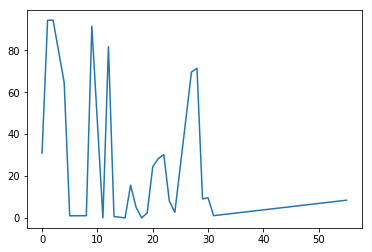

In [25]:
plt.plot('age', data = df_cleaned)

          patient        age                   name           condition  \
11       596A4517   0.000000           David Civera                 HTN   
15       96DA13A1   0.000000           Пётр Каледин              spoken   
18       285648EF   0.033333            Panama Atom                 CRF   
13       79D2876C   0.666667        Henning Wehland                 HTN   
5        4166D680   1.002333             Henry Band                copd   
8        A5E0D927   1.053667  Andrew Paul Woodworth                 HTN   
31       90004D45   1.084333          Irisha Almoni                 CRF   
19       34811AC9   2.333333              Zak Moore                 CRF   
24       94E73621   2.703149        Montezuma Rubio      extremeobesity   
17       AEAEF451   5.000000              Albatraoz                 HTN   
23       A76F54E1   8.043298                 Swords               COVID   
55       D52D00EA   8.443000        Candace Sivokon                 HTN   
29       DD08E7D1   9.054

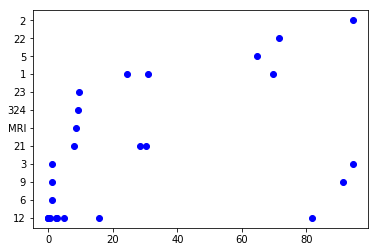

In [26]:
aging = df_cleaned.sort_values(by= 'age')
print(aging)
plt.plot('age','time', 'bo', data = aging )

In [27]:
#ugh, another meaningless bad plot, let's resort this by both values, drop the MRI mistake and replot
# so let's get rid of MRI value as that is clearly wrong

In [28]:
aging.time = pd.to_numeric(aging.time, errors='coerce')
aging.dropna(subset=('time',), inplace=True)
newdf= aging
print(aging.time)
print(newdf)

11     12.0
15     12.0
18     12.0
13     12.0
5       6.0
8       9.0
31      3.0
19     12.0
24     12.0
17     12.0
23     21.0
29    324.0
30     23.0
16     12.0
20      1.0
21     21.0
22     21.0
0       1.0
4       5.0
27      1.0
28     22.0
12     12.0
9       9.0
2       3.0
1       2.0
Name: time, dtype: float64
          patient        age                   name           condition  \
11       596A4517   0.000000           David Civera                 HTN   
15       96DA13A1   0.000000           Пётр Каледин              spoken   
18       285648EF   0.033333            Panama Atom                 CRF   
13       79D2876C   0.666667        Henning Wehland                 HTN   
5        4166D680   1.002333             Henry Band                copd   
8        A5E0D927   1.053667  Andrew Paul Woodworth                 HTN   
31       90004D45   1.084333          Irisha Almoni                 CRF   
19       34811AC9   2.333333              Zak Moore                 CRF  

In [29]:
cap_CT= newdf.replace('ct', 'CT')
cap_XR = cap_CT.replace('xr', 'XR')
cleaner = cap_XR.replace('mri', 'MRI')                       
print(cleaner)

          patient        age                   name           condition  \
11       596A4517   0.000000           David Civera                 HTN   
15       96DA13A1   0.000000           Пётр Каледин              spoken   
18       285648EF   0.033333            Panama Atom                 CRF   
13       79D2876C   0.666667        Henning Wehland                 HTN   
5        4166D680   1.002333             Henry Band                copd   
8        A5E0D927   1.053667  Andrew Paul Woodworth                 HTN   
31       90004D45   1.084333          Irisha Almoni                 CRF   
19       34811AC9   2.333333              Zak Moore                 CRF   
24       94E73621   2.703149        Montezuma Rubio      extremeobesity   
17       AEAEF451   5.000000              Albatraoz                 HTN   
23       A76F54E1   8.043298                 Swords               COVID   
29       DD08E7D1   9.054963         Peter Holzmann            diabetes   
30       22642B7C   9.624

In [30]:
#def switch_out_one_value(df):
 #   df.replace({'time':'MRI'}, 90)
  #          
   # return df
            
#df7 = switch_out_one_value(cleaner)            
#print(df7)    
#cleaner.at['31','time']=100
#print(cleaner)

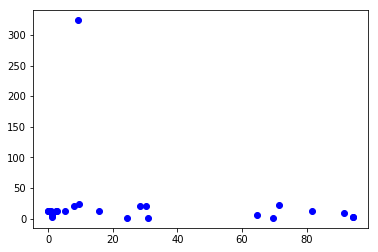

In [89]:
plt.plot('age','time', 'bo', data = newdf)


In [90]:
#print a certain number of lines 
print(aging[20:25])

     patient        age          name           condition     image_type  time
28  9C97ECE2  71.418776    Allen Lide                 CRF  Don't Hurt Me  22.0
12  2E50EDF9  81.680000  Lumipa Beats              hiphop             xr  12.0
9   E9E8A0CA  91.463333  Pillar Point               COVID             xr   9.0
2   FB1E568E  94.327000  Stive Morgan  sickle cell anemia             ct   3.0
1   FB1E568E  94.327000  Stive Morgan              anemia             CT   2.0


In [91]:
##print a certain number of columns
#df1 = df[['a','b']]
print(aging[['patient','name']])
# of by iloc
print(aging.iloc[:,0:3])

          patient                   name
11       596A4517           David Civera
15       96DA13A1           Пётр Каледин
18       285648EF            Panama Atom
13       79D2876C        Henning Wehland
5        4166D680             Henry Band
8        A5E0D927  Andrew Paul Woodworth
31       90004D45          Irisha Almoni
19       34811AC9              Zak Moore
24       94E73621        Montezuma Rubio
17       AEAEF451              Albatraoz
23       A76F54E1                 Swords
29       DD08E7D1         Peter Holzmann
30       22642B7C               Heathers
16       4023830D              Chin Kong
20       892E9835        Kendra Springer
21       46EB28CD       Nathalie Cardone
22       919EFA26                Snowday
0   crazy_patient             Marina Rei
4        82F52E69           Rixton Moore
27       A6D6DBE7           Duerte Roger
28       9C97ECE2             Allen Lide
12       2E50EDF9           Lumipa Beats
9        E9E8A0CA           Pillar Point
2        FB1E568

In [92]:
#make a random dataframe
np.random.seed(5)
dfrandom = pd.DataFrame(np.random.randint(256, size=(100, 26)), 
                  columns=list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'), 
                  index=['R{}'.format(i) for i in range(100)])

In [93]:
dfrandom.head(6)

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
R0,99,206,239,189,230,118,144,73,8,228,...,7,204,143,113,181,231,80,27,44,205
R1,203,65,175,30,212,86,125,146,254,121,...,210,103,144,206,5,58,0,208,132,110
R2,164,105,179,27,31,2,68,38,105,211,...,108,109,158,190,11,235,67,124,193,183
R3,131,91,78,155,157,33,217,85,135,16,...,47,144,133,162,173,187,152,141,118,235
R4,232,31,32,76,172,133,142,175,94,82,...,64,8,218,44,126,165,94,203,133,233
R5,150,180,69,210,188,91,29,216,120,225,...,177,255,72,160,210,13,220,251,239,146


In [62]:
dfrandom.tail(10)

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
R90,48,1,209,254,166,244,242,13,182,112,...,51,53,39,212,88,24,254,94,57,163
R91,148,93,155,203,225,229,61,19,64,50,...,3,32,80,53,85,16,153,145,76,0
R92,242,195,175,131,87,69,17,136,235,106,...,206,254,253,46,80,193,108,70,247,202
R93,137,113,109,167,180,28,43,119,36,234,...,113,50,216,13,162,165,232,170,108,122
R94,68,234,13,248,216,231,232,30,118,214,...,44,52,130,226,248,143,84,78,236,89
R95,165,188,11,245,22,4,18,234,143,147,...,132,238,73,253,74,227,104,186,195,241
R96,164,129,174,21,45,225,55,230,250,222,...,201,78,32,34,26,71,214,64,197,240
R97,59,61,58,66,114,56,109,61,128,28,...,113,142,60,241,40,11,173,152,102,40
R98,210,227,19,187,28,227,248,116,193,87,...,245,136,60,133,78,164,69,105,203,50
R99,69,169,39,146,180,142,62,181,162,205,...,175,113,241,63,189,91,96,43,184,39


In [63]:
# get somewhere inside
dfrandom.loc['R3':'R5', 'C':'E']

,C,D,E
R3,78,155,157
R4,32,76,172
R5,69,210,188


In [64]:
# get columns
df.loc[:, 'C':'E']

,C,D,E
R0,61,16,73
R1,30,80,7
R2,80,27,44
R3,47,30,84
R4,41,62,1
R5,5,58,0
R6,51,27,31
R7,83,19,18
R8,11,67,65
R9,78,27,29


In [66]:
#get rows
dfrandom.loc['R6':'R10',:]

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
R6,52,81,22,58,211,116,235,92,211,177,...,160,10,31,15,124,22,70,137,63,94
R7,14,194,122,57,147,192,8,136,251,121,...,214,252,200,160,143,110,197,35,190,235
R8,171,100,0,130,130,241,219,193,173,215,...,54,152,192,77,73,129,9,64,104,151
R9,167,121,196,239,209,91,36,114,97,87,...,77,97,114,35,29,1,82,20,233,128
R10,113,162,206,179,158,40,74,197,250,79,...,85,217,246,57,229,145,94,113,192,156


In [69]:
#get columns by name
print(dfrandom.B)


R0     206
R1      65
R2     105
R3      91
R4      31
R5     180
R6      81
R7     194
R8     100
R9     121
R10    162
R11    125
R12    192
R13    106
R14    137
R15    213
R16     24
R17    115
R18    229
R19    150
R20      9
R21    238
R22    226
R23    207
R24     69
R25    141
R26     65
R27     62
R28    219
R29    187
      ... 
R70     48
R71    104
R72    146
R73    190
R74    151
R75     20
R76     75
R77    131
R78    203
R79     67
R80     34
R81     40
R82    159
R83     56
R84    222
R85     45
R86    211
R87    238
R88     20
R89    134
R90      1
R91     93
R92    195
R93    113
R94    234
R95    188
R96    129
R97     61
R98    227
R99    169
Name: B, Length: 100, dtype: int32


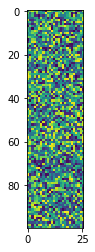

In [114]:
plt.imshow(dfrandom)
#default color scheme is viridis


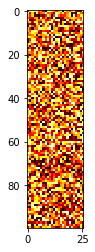

In [115]:
plt.imshow((dfrandom), cmap = 'hot')


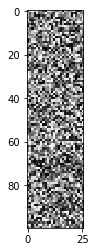

In [116]:
plt.imshow((dfrandom), cmap = 'gray')

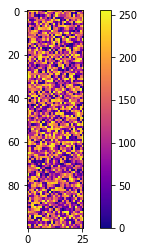

In [117]:
#import matplotlib.image as mpimg
plt.imshow((dfrandom), cmap = 'plasma')
plt.colorbar()

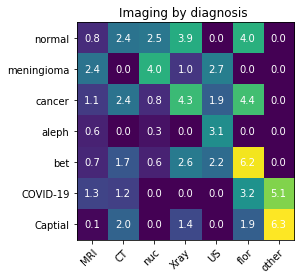

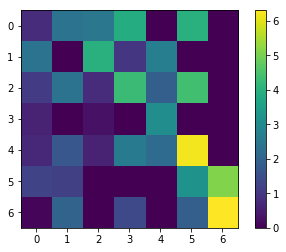

In [129]:



imaging = ["MRI", "CT", "nuc", "Xray",
              "US", "flor", "other"]
diagnosis = ["normal", "meningioma", "cancer",
           "aleph", "bet", "COVID-19", "Captial"]

whatdone = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(whatdone)

# We want to show all ticks...
ax.set_xticks(np.arange(len(imaging)))
ax.set_yticks(np.arange(len(diagnosis)))
# ... and label them with the respective list entries
ax.set_xticklabels(imaging)
ax.set_yticklabels(diagnosis)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(imaging)):
    for j in range(len(diagnosis)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Imaging by diagnosis ")
fig.tight_layout()
plt.show()
plt.imshow(whatdone)
plt.colorbar()